In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
dane = pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa.csv")


In [7]:
list(dane)

['Pozycja',
 'ID',
 'Nazwa ojca',
 'ID ojca',
 'Obora',
 'Hodowca',
 'Województwo',
 'Data urodzenia',
 'IE',
 'Dokł. IE',
 'PF',
 'PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og']

In [8]:
corr_matrix= dane.corr()
korelacje=corr_matrix["IE"].sort_values(ascending=False)
korelacje=korelacje.to_frame()
korelacje=korelacje.reset_index()
korelacje

,index,IE
0,IE,1.000000
1,PF,0.565410
2,Data urodzenia,0.451144
3,WH-KSOM,0.445011
4,WH-DLUG,0.299438
5,Pw,0.267009
6,w,0.243454
7,IP,0.242050
8,PI-PROD,0.237663
9,CRk,0.235873


### Wczytywanie danych

#### EI

<AxesSubplot:>

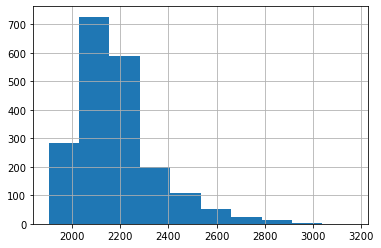

In [9]:
dane['IE'].hist()

In [13]:
dane.shape

(2000, 35)

In [ ]:
### Sprawdzam metryke QTL

In [10]:
dane['IE'].describe()

count    2000.000000
mean     2183.283500
std       167.284866
min      1903.000000
25%      2094.000000
50%      2155.000000
75%      2240.000000
max      3165.000000
Name: IE, dtype: float64

In [17]:
2240-2094 # IQR

146

In [18]:
146*1.5 # QTL

219.0

In [19]:
2094-219 

1875

In [20]:
2094+219

2313

In [21]:
dane[dane['IE']>2313].shape

(337, 35)

In [22]:
dane[dane['IE']<1875].shape

(0, 35)

In [23]:
337/2000

0.1685

### CI

<AxesSubplot:>

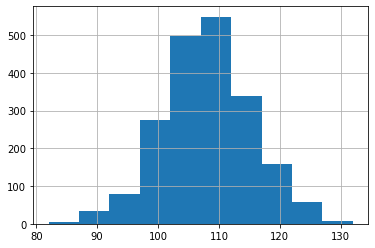

In [14]:
dane['OMC'].hist()

In [15]:
dane['OMC'].describe()

count    2000.000000
mean      107.552000
std         7.341474
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

### Histogramy rozkładu zmiennych

array([[<AxesSubplot:title={'center':'IE'}>,
        <AxesSubplot:title={'center':'PI-PROD'}>,
        <AxesSubplot:title={'center':'PI-POKR'}>,
        <AxesSubplot:title={'center':'Prc'}>,
        <AxesSubplot:title={'center':'Psm'}>],
       [<AxesSubplot:title={'center':'Pnr'}>,
        <AxesSubplot:title={'center':'Pw'}>,
        <AxesSubplot:title={'center':'PI-PLOD'}>,
        <AxesSubplot:title={'center':'CRj'}>,
        <AxesSubplot:title={'center':'CRk'}>],
       [<AxesSubplot:title={'center':'PP'}>,
        <AxesSubplot:title={'center':'OMC'}>,
        <AxesSubplot:title={'center':'WH-KSOM'}>,
        <AxesSubplot:title={'center':'WH-DLUG'}>,
        <AxesSubplot:title={'center':'IP'}>],
       [<AxesSubplot:title={'center':'kg ml'}>,
        <AxesSubplot:title={'center':'kg tł'}>,
        <AxesSubplot:title={'center':'% tł'}>,
        <AxesSubplot:title={'center':'kg bi'}>,
        <AxesSubplot:title={'center':'% bi'}>],
       [<AxesSubplot:title={'center':'rc'}>,
       

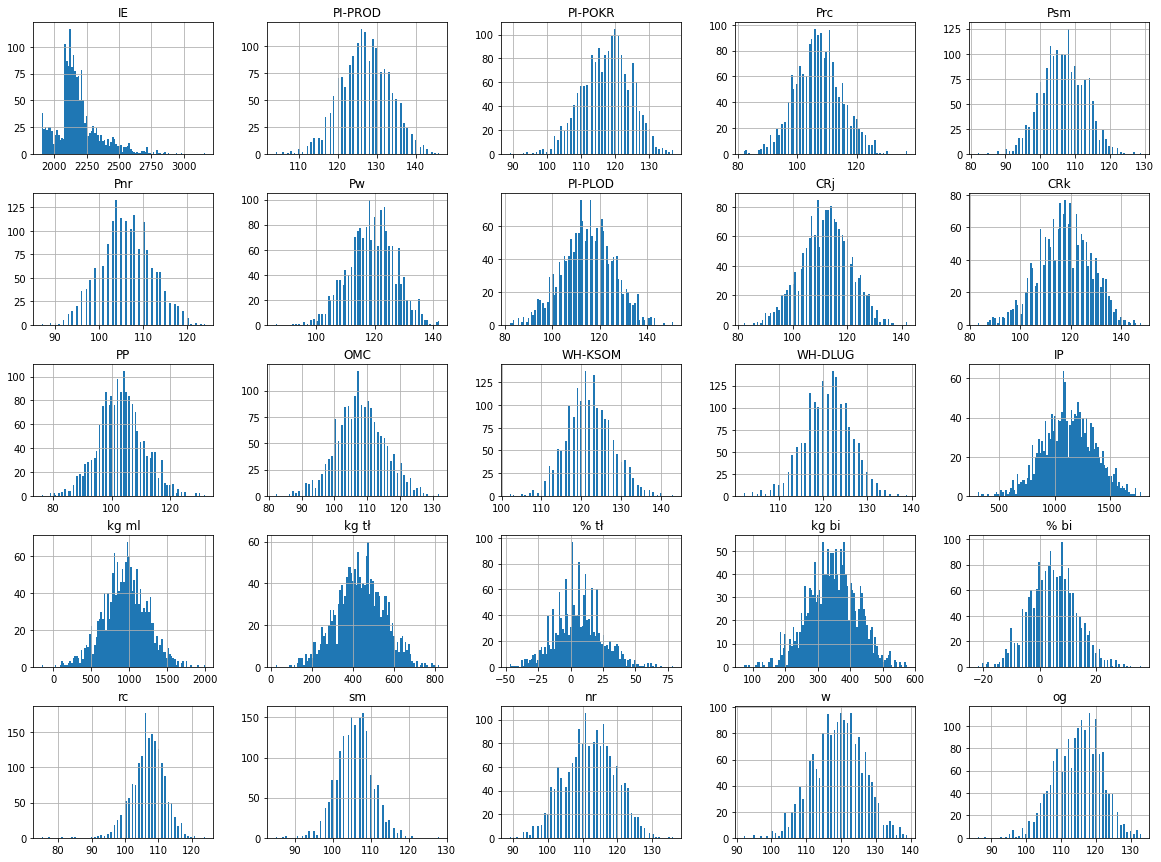

In [9]:
dane.hist(bins=100,figsize=(20,15))

Przed jakimikolwiek dalszymi oględzianmi, rozdzielam dane na zbiór treningowy i testowy w celu uniknięcia
 obciążenia związanego z podglądaniem danych.

### Sprawdzam korelacje liniową zmiennych

In [10]:
corr_matrix= dane.corr()
korelacje=corr_matrix["IE"].sort_values(ascending=False)
korelacje=korelacje.to_frame()
korelacje=korelacje.reset_index()
korelacje

,index,IE
0,IE,1.000000
1,WH-KSOM,0.417513
2,WH-DLUG,0.330746
3,IP,0.239824
4,PI-PROD,0.236858
5,w,0.235788
6,CRk,0.235184
7,Pw,0.222095
8,PI-PLOD,0.220918
9,CRj,0.208279


### Tworzę wszystkie możliwe kombinacjii zmiennych

In [11]:
dane_2=dane.copy()

In [12]:
zmienne=list(dane_2)
zmienne.remove("IE")
zmienne.remove("Województwo")
zmienne.remove("Data urodzenia")


In [13]:
for x in zmienne:
    for y in zmienne:
        if x!=y:
            zmienna_2=x+"|"+y
            dane_2[zmienna_2]=dane_2[x]/dane_2[y]

In [14]:
corr_matrix_2= dane_2.corr()
t=corr_matrix_2["IE"].sort_values(ascending=False)
wyniki=t.to_frame()
wyniki=wyniki.reset_index()
wyniki.head() #626 pozycji to za dużo do ręcznego sprawdzania - tworzę niżej skrypt

,index,IE
0,IE,1.000000
1,WH-KSOM,0.417513
2,WH-DLUG,0.330746
3,WH-KSOM|sm,0.292574
4,WH-KSOM|rc,0.266520


In [15]:
wszystkie_stw=list(wyniki['index'])

In [16]:
wszystkie_stw

['IE',
 'WH-KSOM',
 'WH-DLUG',
 'WH-KSOM|sm',
 'WH-KSOM|rc',
 'WH-KSOM|Pnr',
 'IP|Psm',
 'IP|sm',
 'WH-KSOM|Psm',
 'IP|PI-PROD',
 'IP',
 'IP|rc',
 'PI-PROD',
 'w',
 'CRk',
 'IP|Prc',
 'IP|Pnr',
 'Pw',
 'kg bi|Psm',
 'PI-PLOD',
 'kg bi|sm',
 'kg tł|Psm',
 'IP|og',
 'CRj',
 'w|sm',
 'kg bi',
 'kg tł|sm',
 'WH-DLUG|Pnr',
 'WH-DLUG|sm',
 'kg bi|rc',
 'Pw|sm',
 'kg tł',
 'kg bi|Prc',
 'kg tł|rc',
 'PI-PROD|sm',
 'kg bi|Pnr',
 'kg bi|PI-PROD',
 'WH-KSOM|Prc',
 'IP|nr',
 'kg tł|Prc',
 'kg tł|Pnr',
 'PI-POKR|sm',
 'CRk|sm',
 'PI-PROD|Psm',
 'w|Pnr',
 'Pw|rc',
 'PI-POKR',
 'PI-POKR|Pnr',
 'w|rc',
 'WH-DLUG|rc',
 'CRk|Pnr',
 'WH-KSOM|PP',
 'CRk|rc',
 'kg tł|PI-PROD',
 'Pw|Pnr',
 'PI-PLOD|Pnr',
 'PI-PLOD|sm',
 'kg tł|og',
 'IP|PI-POKR',
 'PI-PLOD|rc',
 'kg bi|og',
 'IP|PP',
 'Pw|Psm',
 'w|Psm',
 'kg tł|nr',
 'OMC|PP',
 'WH-DLUG|Psm',
 'PI-PLOD|CRj',
 'WH-KSOM|og',
 'PI-POKR|rc',
 'CRk|Psm',
 'WH-KSOM|nr',
 'kg bi|nr',
 'CRk|PP',
 'PI-PLOD|PP',
 'CRj|sm',
 'PI-PLOD|Psm',
 'PI-PROD|rc',
 'Pw|og',
 

In [17]:
wyniki['IE']

0      1.000000
1      0.417513
2      0.330746
3      0.292574
4      0.266520
         ...   
572   -0.236547
573   -0.242505
574   -0.258694
575   -0.272700
576   -0.291876
Name: IE, Length: 577, dtype: float64

### Spradzam czy ten zabieg wytworzył nową, lepszą niż składowe zmienną

In [18]:
zmienne

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og']

In [55]:
do_ex=pd.DataFrame()
l_wyn=[]
for x in zmienne:
    akt_kom,akt_wart='',0
    m_val= abs(list(wyniki[(wyniki['index']==x)]['IE'])[0]) # wart pods zmiennej
    for index, row in wyniki.iterrows():
        if '|' in row['index']: # jezeli to kombinacja
            if x in row['index']: #jezeli zawiera zmienna
                qqq=row['index'].split('|')[0]
                qqq2=row['index'].split('|')[1]
                if qqq==x:
                    if abs(row['IE']) > m_val: #dana komb > podst zmienna 1
                        if abs(row['IE']) > abs(list(wyniki[(wyniki['index']==qqq2)]['IE'])[0]): #dana komb > podst zmienna 2
                            #print(abs(list(wyniki[(wyniki['index']==qqq2)]['IE'])[0]), m_val)
                            akt_kom,akt_wart=row['index'],row['IE']
                            row=[x,abs(round(m_val,2)),qqq2,round(abs(list(wyniki[(wyniki['index']==qqq2)]['IE'])[0]),2),akt_kom,abs(round(akt_wart,2))]
                            w=pd.Series(row)
                            do_ex=do_ex.append(w,ignore_index=True)
do_ex.columns=['Zmienna 1', 'Kor 1','Zmienna 2','Kor 2','Zmienna komb','kor komb']

In [56]:
do_ex

,Zmienna 1,Kor 1,Zmienna 2,Kor 2,Zmienna komb,kor komb
0,PI-POKR,0.19,sm,0.01,PI-POKR|sm,0.19
1,Psm,0.01,og,0.12,Psm|og,0.15
2,Pnr,0.02,nr,0.10,Pnr|nr,0.13
3,Pnr,0.02,PI-POKR,0.19,Pnr|PI-POKR,0.19
4,PP,0.05,OMC,0.15,PP|OMC,0.17
5,OMC,0.15,PP,0.05,OMC|PP,0.17
6,IP,0.24,Psm,0.01,IP|Psm,0.26
7,IP,0.24,sm,0.01,IP|sm,0.25
8,IP,0.24,PI-PROD,0.24,IP|PI-PROD,0.24
9,kg ml,0.09,Psm,0.01,kg ml|Psm,0.09


In [59]:
do_ex.to_csv('Kor IE.csv')

In [51]:
l_wyn

[('IP|PI-PROD', 0.2412098149307539),
 ('sm|PI-POKR', -0.19140380082684796),
 ('Prc|IP', -0.2207632557945951),
 ('Psm|WH-KSOM', -0.24250532872591662),
 ('Pnr|WH-KSOM', -0.25869440152692186),
 ('', 0),
 ('', 0),
 ('', 0),
 ('', 0),
 ('PP|IP', -0.18408992941827876),
 ('PP|OMC', -0.1722699212406056),
 ('', 0),
 ('', 0),
 ('IP|PI-PROD', 0.2412098149307539),
 ('kg ml|kg tł', -0.09583006287795688),
 ('kg tł|sm', 0.2070925859180161),
 ('% tł|rc', 0.08219763948687653),
 ('kg bi|sm', 0.21331173925643918),
 ('', 0),
 ('rc|WH-KSOM', -0.2726998529674157),
 ('sm|WH-KSOM', -0.29187614067370643),
 ('Pnr|WH-KSOM', -0.25869440152692186),
 ('', 0),
 ('og|IP', -0.2017769824598957)]

In [35]:
for x in range(wyniki.shape[0]):
    if wyniki['OMC' in wyniki['index']]

KeyError: False

In [22]:
#Wybieram pierwsze wpisy, ponieważ korealcja w data framie wyniki jest spadkowa - im niżej tym gorsza # a nie nizsza tylko gorsza
na_tulpy=[]
na_wyniki=[]
for q in wszystkie_stw:
    a=str(wyniki["IE"].loc[wyniki['index'] == q]).split("    ")[1].split("\n")[0]
    b=q
    tulpa=(b,a)
    na_tulpy.append(tulpa)
na_tulpy

IndexError: list index out of range

In [17]:
obiecujace=[]
for tulpa in na_tulpy:
    x=tulpa[0]
    wynik=float(tulpa[1])
    nazwy_dwie=x.split("|")
    w_1=float(str(korelacje["IE"].loc[korelacje["index"]==nazwy_dwie[0]]).split("\n")[0].split("   ")[1])
    w_2=float(str(korelacje["IE"].loc[korelacje["index"]==nazwy_dwie[1]]).split("\n")[0].split("   ")[1])
    if abs(w_1) <= abs(wynik) :
        if abs(w_2)<=abs(wynik):   
            print(nazwy_dwie[0], w_1,"\t", "oraz","\t",nazwy_dwie[1], w_2, "->","\t", nazwy_dwie[0],"|",nazwy_dwie[1], wynik)
            obiecujace.append(x)

IP 0.239824 	 oraz 	 Psm 0.013767 -> 	 IP | Psm 0.260667
OMC 0.146792 	 oraz 	 PP 0.046453 -> 	 OMC | PP 0.170628


### Kombinacje zmiennych, o korelacji lepszej niż z osobna

In [18]:
obiecujace

['IP|Psm', 'OMC|PP']

## IE według województwa

In [19]:
dane['Województwo'].value_counts()

WIELKOPOLSKIE          524
KUJAWSKO-POMORSKIE     261
OPOLSKIE               210
ZACHODNIOPOMORSKIE     183
PODLASKIE              161
MAZOWIECKIE             97
POMORSKIE               85
LUBUSKIE                40
ŁÓDZKIE                 37
DOLNOŚLĄSKIE            29
WARMIŃSKO-MAZURSKIE     21
ŚLĄSKIE                 16
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                3
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [20]:
woj=["WIELKOPOLSKIE",          
"KUJAWSKO-POMORSKIE",     
"OPOLSKIE",               
"ZACHODNIOPOMORSKIE",     
"PODLASKIE",              
"MAZOWIECKIE",             
"POMORSKIE",               
"LUBUSKIE",                
"ŁÓDZKIE",                 
"DOLNOŚLĄSKIE",            
"WARMIŃSKO-MAZURSKIE",     
"ŚLĄSKIE",                 
"ŚWIĘTOKRZYSKIE",          
"MAŁOPOLSKIE",            
]             
woj_dict={}
for x in woj:
    woj_dict[x]=dane['IE'][dane['Województwo']==x].mean()

In [21]:
woj_dict

{'WIELKOPOLSKIE': 2191.0419847328244,
 'KUJAWSKO-POMORSKIE': 2200.76245210728,
 'OPOLSKIE': 2171.109523809524,
 'ZACHODNIOPOMORSKIE': 2207.256830601093,
 'PODLASKIE': 2173.8571428571427,
 'MAZOWIECKIE': 2173.577319587629,
 'POMORSKIE': 2143.0941176470587,
 'LUBUSKIE': 2180.35,
 'ŁÓDZKIE': 2144.0810810810813,
 'DOLNOŚLĄSKIE': 2177.7586206896553,
 'WARMIŃSKO-MAZURSKIE': 2120.809523809524,
 'ŚLĄSKIE': 2237.625,
 'ŚWIĘTOKRZYSKIE': 2194.230769230769,
 'MAŁOPOLSKIE': 2165.5833333333335}

In [22]:
keys = woj_dict.keys()
values = woj_dict.values()

dane_wojewodztwa = pd.DataFrame({'IE': values,
                 'Województwa': keys})

In [23]:
dane_wojewodztwa

,IE,Województwa
0,2191.041985,WIELKOPOLSKIE
1,2200.762452,KUJAWSKO-POMORSKIE
2,2171.109524,OPOLSKIE
3,2207.256831,ZACHODNIOPOMORSKIE
4,2173.857143,PODLASKIE
5,2173.577320,MAZOWIECKIE
6,2143.094118,POMORSKIE
7,2180.350000,LUBUSKIE
8,2144.081081,ŁÓDZKIE
9,2177.758621,DOLNOŚLĄSKIE


In [24]:
dane_wojewodztwa=dane_wojewodztwa.sort_values(by=['IE'])


In [32]:
dane_wojewodztwa=dane_wojewodztwa.rename(columns={"IE": "Economic Index", "Województwa": "Voivodeships"})

<AxesSubplot:title={'center':'Economic Index ~ voivodeship'}, ylabel='Voivodeships'>

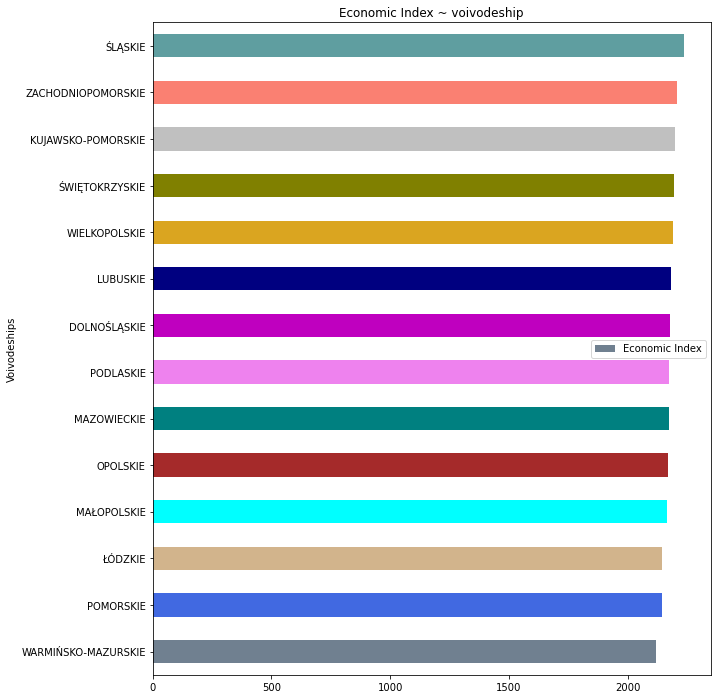

In [35]:
# Draw a vertical bar chart
my_colors=['slategray','royalblue','tan','cyan','brown','teal','violet','m','navy','goldenrod','olive','silver','salmon','cadetblue']  #red, green, blue, black, etc.
dane_wojewodztwa.plot.barh(x="Voivodeships",
                           y="Economic Index", rot=0,
                           title= "Economic Index ~ voivodeship",figsize=(10,12),color=my_colors)


In [ ]:
plotdata['pies'].plot(kind="barh")
plt.title("Mince Pie Consumption Study Results")
plt.ylabel("Family Member")
plt.xlabel("Pies Consumed")

## IE według roku urodzenia

In [26]:
dane['Data urodzenia'].value_counts()

2020    953
2019    365
2018    255
2017     60
2021     38
2016     21
2015      1
Name: Data urodzenia, dtype: int64

In [27]:
uro=[2021,2020,2019,2018,2017,2016]             
uro_dict={}
for x in uro:
    uro_dict[x]=dane['IE'][dane['Data urodzenia']==x].mean()

In [28]:
keys = uro_dict.keys()
values = uro_dict.values()

dane_uro = pd.DataFrame({'IE': values,
                 'Data urodzenia': keys})

In [29]:
dane_uro

,IE,Data urodzenia
0,2256.842105,2021
1,2235.836306,2020
2,2170.575342,2019
3,2057.486275,2018
4,2009.200000,2017
5,2029.571429,2016


In [30]:
dane_uro=dane_uro.sort_values(by=['IE'])


<AxesSubplot:title={'center':'IE ~ Data urodzenia'}, ylabel='Data urodzenia'>

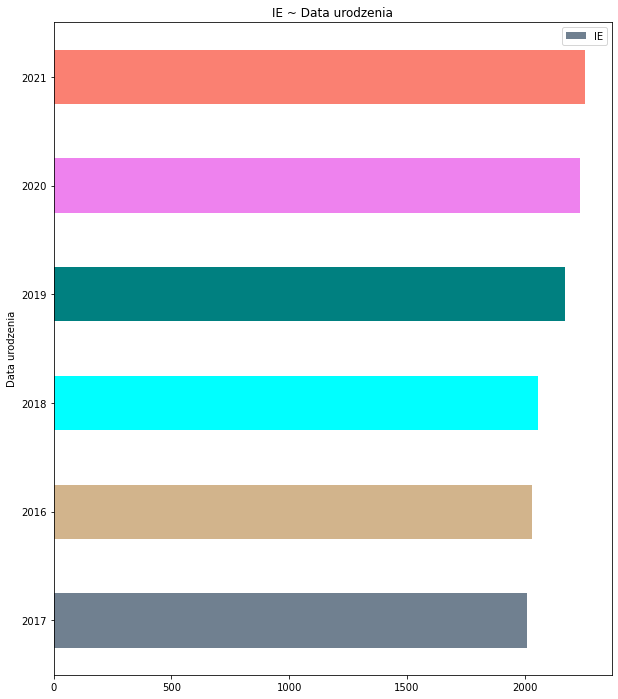

In [31]:
# Draw a vertical bar chart
my_colors=['slategray','tan','cyan','teal','violet','salmon','cadetblue']  #red, green, blue, black, etc.
dane_uro.plot.barh(x="Data urodzenia",
                           y="IE", rot=0,
                           title= "IE ~ Data urodzenia",figsize=(10,12),color=my_colors)
